#Vector Space in Linear Algebra

In mathematics and physics, a vector space (also called a linear space) is a set whose elements, often called vectors, may be added together and multiplied ("scaled") by numbers called scalars

In simple words :  a vector space is a set of vectors that can be scaled and added together.

Step 1 : We will define two vectors in a 2D space and plot them.

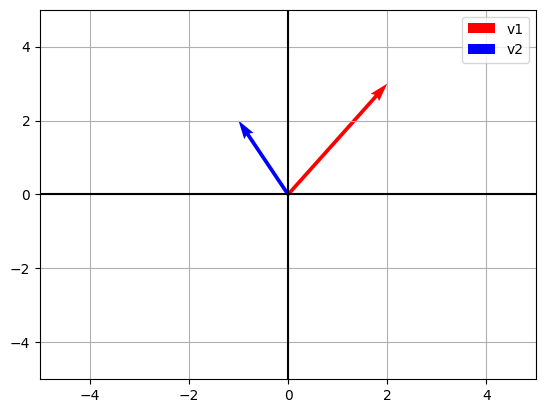

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define vectors
v1 = np.array([2, 3])
v2 = np.array([-1, 2])

# Plot vectors
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()
plt.show()


# Span

Now for these two vectors, what is their span?
It is all possible linear combinations of these vectors. Let's see a subset of the span of v1 and v2 using python.

Point to remember: (Scalars are nothing but real numbers
so 6,5,7,8 are all scalars)


[-2 -1  0  1  2]


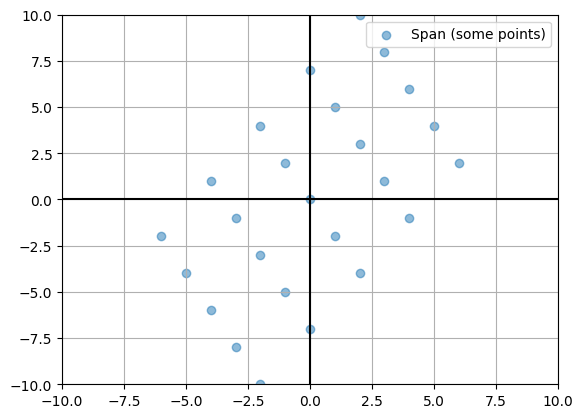

In [6]:
# Create a range for scalar multipliers [numpy.arange(start,stop,step)]
scalars = np.arange(-2, 3, 1)

print(scalars)

# Calculate span (generate combination of values to express our span_vectors)
span_vectors = []

for a in scalars:
    for b in scalars:
        linear_combination = a * v1 + b * v2
        span_vectors.append(linear_combination)

# We convert our generated vectors into an array
span = np.array(span_vectors)

# Plot span
plt.scatter(span[:, 0], span[:, 1], alpha=0.5, label='Span (some points)')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()
plt.show()


The code above plots a subset of points that are linear combinations of v1 and v2, represented by the dots we plotted.
Here we can see every point is a possible destination by scaling and adding v1 and v2 together. According to the math, the span of these vectors would cover the entire 2D plane since they are not scalar multiples of each other. (different vectors and not the same vector multiplied with a constant, also called as linear independence)

# Linear Independence

By definition two vectors are linearly independent if A vector cannot be expressed as a combination of the other and vice versa.
Let's check if our v1 and v2 are linearly independent or not.

In [3]:
# Check if vectors are linearly independent
matrix = np.vstack((v1, v2))
is_independent = np.linalg.matrix_rank(matrix) == matrix.shape[0]

# Output result
print("Vectors are linearly independent:", is_independent)


Vectors are linearly independent: True


Now let's visualize their linear independence



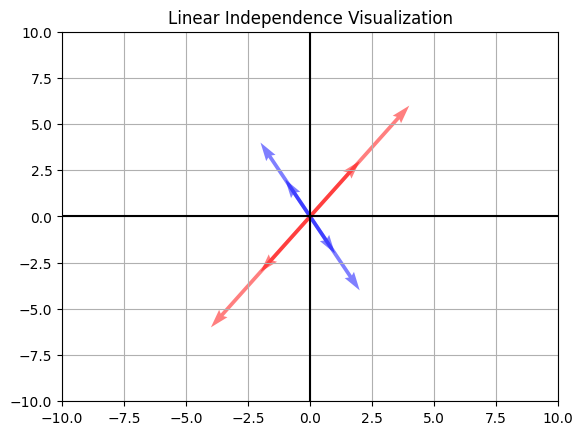

In [4]:
# Plot multiples of v1 and v2
for a in scalars:
    plt.quiver(0, 0, a*v1[0], a*v1[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    plt.quiver(0, 0, a*v2[0], a*v2[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title("Linear Independence Visualization")
plt.show()


 Our vectors scaled by different amounts do not line up along the same line, which means that they are not multiples of each other and thus are linearly independent.

 The basis of a vector space is a set of linearly independent vectors that span the entire plane.

# **Thus, by definition using both of them we can plot all points on the 2D plane.**

#Projections

Projection is the process of mapping a vector onto another vector or subspace that best represents the original vector in that subspace.
We can use it to bring our vector to a lower dimension space.

The projection of vector v onto vector u is given by :

projection = (dot_product_v_and_u / dot_product_u_and_u)*u


Steps we will take to implement this in python:


**Step 1**: Define vectors v and u.

**Step 2**: Compute the dot product of v and u.

**Step 3**: Compute the dot product of u with itself.

**Step 4**: Calculate the projection of v onto u using the formula.


In [7]:
import numpy as np

# Define vectors of v and u:
v = np.array([0, 1, 3])
u = np.array([1, 2, 1])

# Step 2: Dot product of v and u:
dot_product_vu = np.dot(v, u)

# Step 3: Dot product of u with itself:
dot_product_uu = np.dot(u, u)

# Step 4: Calculate the projection:
projection = (dot_product_vu / dot_product_uu) * u

print("Projection of v onto u:", projection)


Projection of v onto u: [0.83333333 1.66666667 0.83333333]


We will do a class question in a step by step manner using code. (Find projection on this time two vectors)
####Project q = [1,3,5] onto a span of {[0,3,0],[2,1,0]}

In [10]:
import numpy as np

q = np.array([1, 3, 5])
u1 = np.array([0, 3, 0])
u2 = np.array([2, 1, 0])

def project(q, u):
    return (np.dot(q, u) / np.dot(u, u)) * u


proj_q_onto_u1 = project(q, u1)
proj_q_onto_u2 = project(q, u2)


proj_q_onto_span = proj_q_onto_u1 + proj_q_onto_u2

print("Projection of q onto the span:", proj_q_onto_span)


Projection of q onto the span: [2. 4. 0.]


# Visualization of our projection

Original vector is of blue color, and projection of q is of red color

Text(0.5, 0, 'Z')

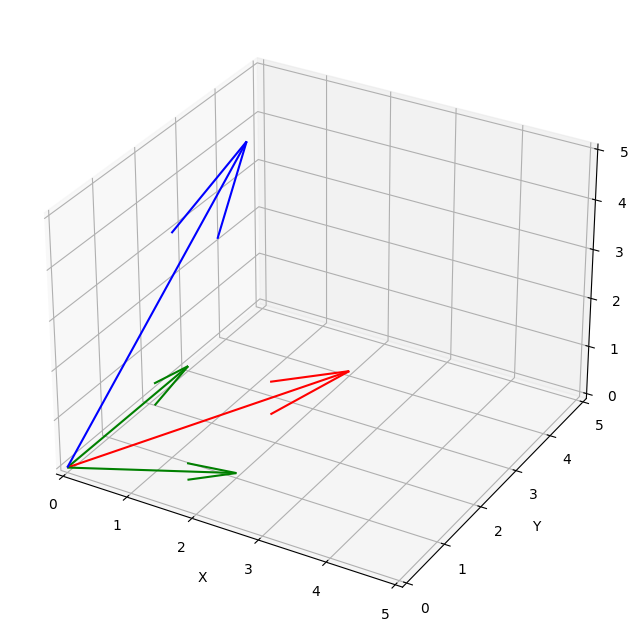

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the original vectors
ax.quiver(0, 0, 0, q[0], q[1], q[2], color='b', label='q')
ax.quiver(0, 0, 0, u1[0], u1[1], u1[2], color='g', label='u1')
ax.quiver(0, 0, 0, u2[0], u2[1], u2[2], color='g', label='u2')
ax.quiver(0, 0, 0, proj_q_onto_span[0], proj_q_onto_span[1], proj_q_onto_span[2], color='r', label='Projection of q onto span')

# Setting the plot limits
ax.set_xlim([0, max(q[0], proj_q_onto_span[0], 5)])
ax.set_ylim([0, max(q[1], proj_q_onto_span[1], 5)])
ax.set_zlim([0, max(q[2], proj_q_onto_span[2], 5)])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
